In [101]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2

# Curva característica de un LED

In [102]:
def Minimos_cuadrados(x,y,n=1):
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)

    xsol = np.linalg.solve(AT,bT)
    
    return xsol

def GetModel(x,p):
    
    y = 0.
    for i in range(len(p)):
        y += p[i]*x**i
        
    return y

def GetError(x,y,p,n=1):
    
    l = x.shape[0]
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    # Residuos
    R = y - np.dot(A,p)
    
    sigma2 = np.dot(R.T,R)/(len(y)-len(p))
    
    Cov = sigma2*np.linalg.inv(np.dot(A.T,A))
    
    R2 = None
    if np.shape(Cov) == (2,2):
        R2 = (Cov[0][1]**2)/(Cov[0][0]*Cov[1][1])

    return (Cov,R2,R)

def Get_sigma(Cov):
    sigmaai = np.sqrt(np.diagonal(Cov))
    return sigmaai[::-1]

def Error_relativo(X_real,X_exp):
    return (np.abs(X_exp - X_real)/X_real)

def presicion(d,v):
    p = (d/v)
    if p <= 0.1:
        return p,True
    else:
        return p,False
    
def exactitud(xr,xm,d):
    e = (np.abs(xr-xm))
    if e <= (2.5*d):
        return e/d,True
    else:
        return e/d,False

X = sym.Symbol('x',real=True)
Y = sym.Symbol('y',real=True)

In [103]:
c = 299798458*1e09 #nm/s
c_ = 299798458 #m/s
me = 0.51099895*1e06/(c**2) #eV/c**2
me_ = 0.51099895*1e06/(c_**2) #eV/c**2
mp = 938.27208816*1e06/(c**2) #eV/c**2
mn = 939.56542052*1e06/(c**2) #eV/c**2
h = 4.136667696*1e-15 #eV*s
h_barra = 6.582119569*1e-16 #eV*s
e_0 = 55.26349406*1e-03 #e**2/(cV*nm)
e = 1 #e
a_0 = 0.0529177210903 #nm
Ry = 13.605693122994 #eV
Miu_B = 5.7883818066*1e-05 #eV/T

# Datos

Azul

In [104]:
V_e_azul = 2.15 #V
A_e_azul = 0.3*(10**(-6)) #A

A_miu = np.array([20., 40., 60., 80., 100., 120., 140., 160., 180., 200.])*(10**(-6))
A_mili = np.array([1., 2., 3., 4., 5., 6., 8., 10., 20., 30.])*(10**(-3))
A_azul = np.array([A_miu,A_mili])
A_azul = A_azul.flatten(order='A')

V_miu = np.array([2.47, 2.5, 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.56, 2.57])
V_mili = np.array([2.68, 2.76, 2.82, 2.86, 2.9, 2.94, 3., 3.05, 3.21, 3.37])
V_azul = np.array([V_miu,V_mili])
V_azul = V_azul.flatten(order='A')

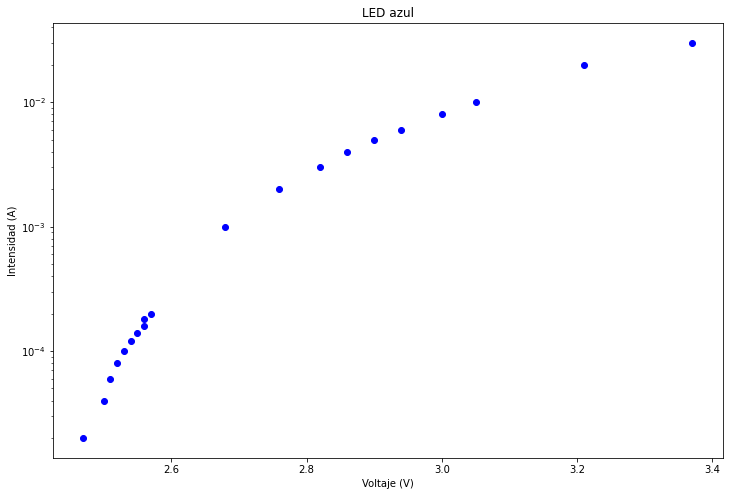

In [105]:
plt.figure(figsize=(12,8))
plt.scatter(V_azul,A_azul,color='blue')
plt.ylabel('Intensidad (A)')
plt.xlabel('Voltaje (V)')
plt.title('LED azul')
plt.yscale('log')

Rojo

In [106]:
V_e_rojo = 1.53 #V
A_e_rojo = 1.*(10**(-6)) #A

A_miu = np.array([20., 40., 60., 80., 100., 120., 140., 160., 180., 200.])*(10**(-6))
A_mili = np.array([0.002, 0.006, 0.021, 0.058, 0.2, 0.6, 1.3, 3.4, 5.8, 11.4])*(10**(-3))
A_rojo = np.array([A_miu,A_mili])
A_rojo = A_rojo.flatten(order='A')

V_miu = np.array([1.66, 1.69, 1.7, 1.71, 1.72, 1.73, 1.74, 1.74, 1.75, 1.75])
V_mili = np.array([1.55, 1.6, 1.65, 1.7, 1.75, 1.8, 1.85, 1.9, 1.95, 2.])
V_rojo = np.array([V_miu,V_mili])
V_rojo = V_rojo.flatten(order='A')

In [107]:
A_rojo

array([2.00e-05, 4.00e-05, 6.00e-05, 8.00e-05, 1.00e-04, 1.20e-04,
       1.40e-04, 1.60e-04, 1.80e-04, 2.00e-04, 2.00e-06, 6.00e-06,
       2.10e-05, 5.80e-05, 2.00e-04, 6.00e-04, 1.30e-03, 3.40e-03,
       5.80e-03, 1.14e-02])

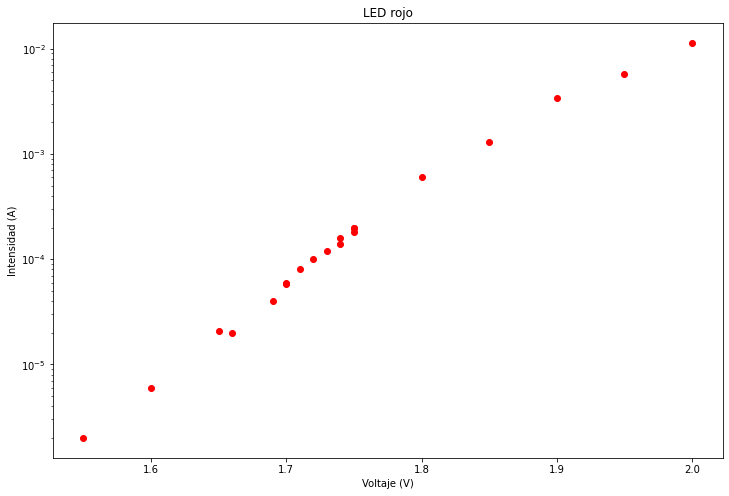

In [108]:
plt.figure(figsize=(12,8))
plt.scatter(V_rojo,A_rojo,color='red')
plt.ylabel('Intensidad (A)')
plt.xlabel('Voltaje (V)')
plt.title('LED rojo')
plt.yscale('log')

Verde

In [109]:
V_e_verde = 2.15 #V
A_e_verde = 0.3*(10**(-6)) #A

A_miu = np.array([20., 40., 60., 80., 100., 120., 140., 160., 180., 200.])*(10**(-6))
A_mili = np.array([0.2, 0.99, 2.75, 5.85, 11.55, 24.6, 54.7])*(10**(-3))
A_verde = np.concatenate((A_miu,A_mili))

V_miu = np.array([2.15, 2.18, 2.19, 2.21, 2.22, 2.23, 2.24, 2.25, 2.25, 2.26])
V_mili = np.array([2.26, 2.4, 2.6, 2.8, 3., 3.2, 3.37])
V_verde = np.concatenate((V_miu,V_mili))

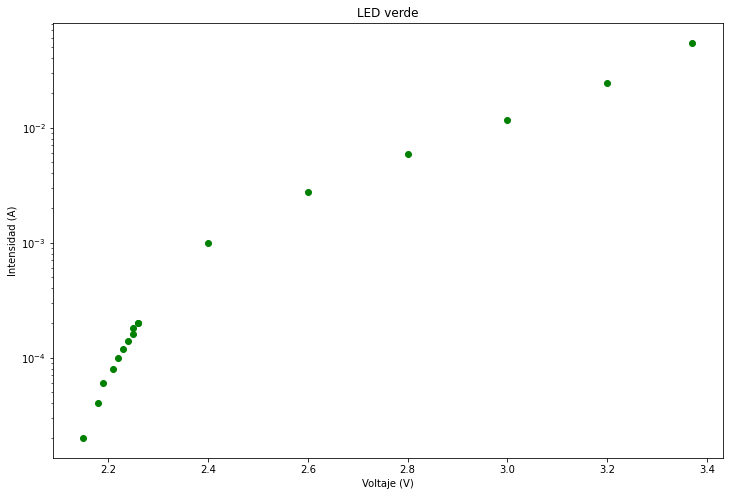

In [110]:
plt.figure(figsize=(12,8))
plt.scatter(V_verde,A_verde,color='green')
plt.ylabel('Intensidad (A)')
plt.xlabel('Voltaje (V)')
plt.title('LED verde')
plt.yscale('log')

Ámbar

In [111]:
V_e_ambar = 1.6 #V
A_e_ambar = 5.*(10**(-6)) #A

A_miu = np.array([20., 40., 60., 80., 100., 120., 140., 160., 180., 200.])*(10**(-6))
A_mili = np.array([6.*(10**(-3)), 18.*(10**(-3)), 55.*(10**(-3)), 140.*(10**(-3)), 0.03, 0.12, 0.25, 0.57, 11., 19., 35.])*(10**(-3))
A_ambar = np.concatenate((A_miu,A_mili))

V_miu = np.array([1.67, 1.7, 1.72, 1.73, 1.74, 1.75, 1.76, 1.76, 1.77, 1.77])
V_mili = np.array([1.6, 1.65, 1.7, 1.75, 1.8, 1.85, 1.9, 1.95, 2., 2.05, 2.1])
V_ambar = np.concatenate((V_miu,V_mili))

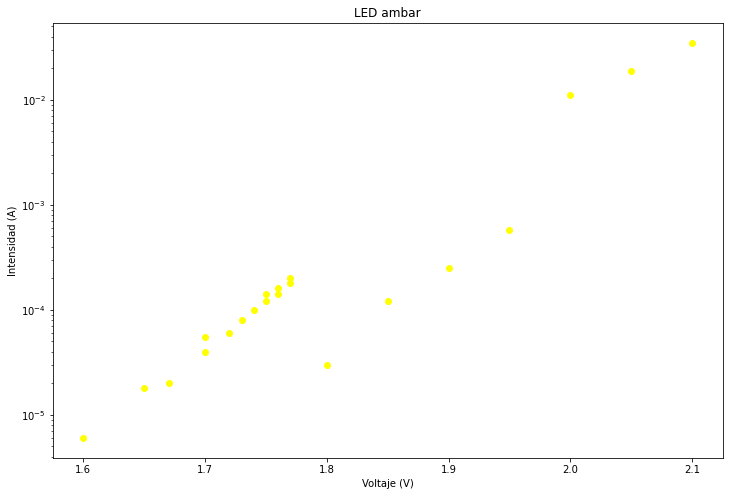

In [112]:
plt.figure(figsize=(12,8))
plt.scatter(V_ambar,A_ambar,color='yellow')
plt.ylabel('Intensidad (A)')
plt.xlabel('Voltaje (V)')
plt.title('LED ambar')
plt.yscale('log')

# Grafica total

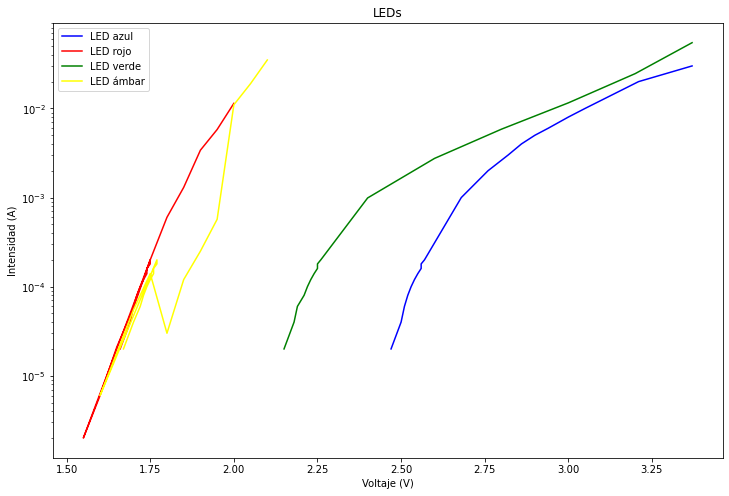

In [114]:
plt.figure(figsize=(12,8))
plt.plot(V_azul,A_azul,color='blue',label='LED azul')
plt.plot(V_rojo,A_rojo,color='red',label='LED rojo')
plt.plot(V_verde,A_verde,color='green',label='LED verde')
plt.plot(V_ambar,A_ambar,color='yellow',label='LED ámbar')
plt.ylabel('Intensidad (A)')
plt.xlabel('Voltaje (V)')
plt.title('LEDs')
plt.legend()
plt.yscale('log')